# Imperative Programming and Declarative Programming
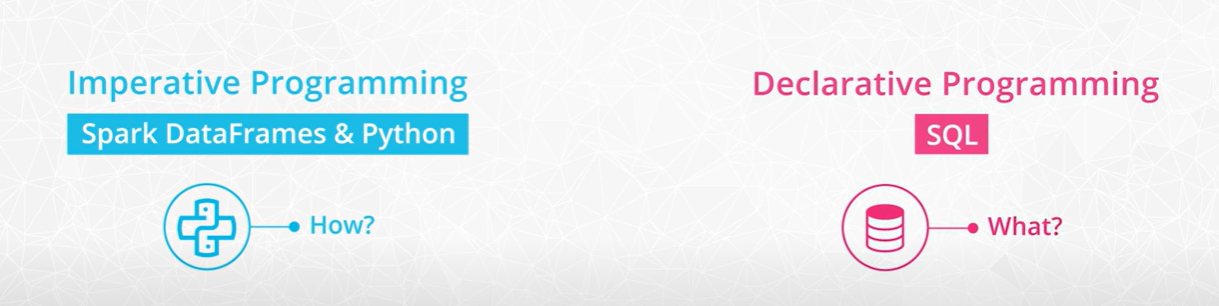

* En la **programación declarativa** nos centramos en definir (qué) queremos obtener. Ex: Sql, postgress, **SparkSQL** 
* En la **programación imperative** nos centramos en los pasos necesarios (cómo) para conseguir el resultado. Ex: Pandas, **Pyspark**.

### General functions

We have used the following general functions that are quite similar to methods of pandas dataframes:

* select(): returns a new DataFrame with the selected columns
* filter(): filters rows using the given condition
* where(): is just an alias for filter()
* groupBy(): groups the DataFrame using the specified columns, so we can run aggregation on them
* sort(): returns a new DataFrame sorted by the specified column(s). By default the second parameter 'ascending' is True.
* dropDuplicates(): returns a new DataFrame with unique rows based on all or just a subset of columns
* withColumn(): returns a new DataFrame by adding a column or replacing the existing column that has the same name. The first parameter is the name of the new column, the second is an expression of how to compute it.



### Aggregate functions

Spark SQL provides built-in methods for the most common aggregations in the pyspark.sql.functions module such as 
* count()
* countDistinct()
* avg()
* max()
* min()

These methods are not the same as the built-in methods in the Python Standard Library, where we can find min() for example as well, hence you need to be careful not to use them interchangeably.

In many cases, there are multiple ways to express the same aggregations. 

For example, if we would like to compute one type of aggregate for one or more columns of the DataFrame we can just simply chain the aggregate method after a groupBy(). 

If we would like to use different functions on different columns, agg()comes in handy. 

For example agg({"salary": "avg", "age": "max"}) computes the average salary and maximum age.



### User defined functions (UDF)

In Spark SQL we can **define our own functions with the udf** method from the pyspark.sql.functions module. The default type of the returned variable for UDFs is string. If we would like to return an other type we need to explicitly do so by using the different types from the pyspark.sql.types module.



### Window functions

Window functions are a way of combining the values of ranges of rows in a DataFrame. When defining the window we can choose how to sort and group (with the partitionBy method) the rows and how wide of a window we'd like to use (described by rangeBetween or rowsBetween).

In [ ]:
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 5.1 MB/s eta 0:00:00


# Pyspark for beginners

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
# Crear una session de spark
spark = SparkSession \
      .builder \
      .appName("Our first Spark SQL example") \
      .getOrCreate()

In [ ]:
# Obtener la configuracion de spark
spark.sparkContext.getConf().getAll()

[('spark.driver.extraJavaOptions',
  '-XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED'),
 ('spark.app.name', 'Our first Spark SQL example'),
 ('spark.driver.port', '44981'),
 ('spark.executor.id', 'driver'),
 ('spark.app.id', 'local-1676798519223'),
 ('spark.driver.host', '281a538997d3'),
 ('spark.app.submitTime', '16767

## Reading and Writing Data with Spark

In [ ]:
# Leer un fichero json (ruta local, ruta AWS, ruta HDFS, etc)
path = "/content/sparkify_log_small.json"
user_log = spark.read.json(path)

In [ ]:
# imprimer esquema
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [ ]:
# Describir las columnas del DataFrame
user_log.describe()

DataFrame[summary: string, artist: string, auth: string, firstName: string, gender: string, itemInSession: string, lastName: string, length: string, level: string, location: string, method: string, page: string, registration: string, sessionId: string, song: string, status: string, ts: string, userAgent: string, userId: string]

In [ ]:
# Mostrar first record
user_log.show(n=1)

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+------

In [ ]:
user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

## Save dataframe in another format

In [ ]:
# Guardar el dataframe en otro formato. Ex: Csv
out_path = "/content/sparkify_log_small.csv"
user_log.write.save(out_path, format="csv", header=True)

In [ ]:
# Leer el fichero en formato csv
user_log_2 = spark.read.csv(out_path, header=True)

In [ ]:
user_log_2.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: string (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: string (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: string (nullable = true)
 |-- sessionId: string (nullable = true)
 |-- song: string (nullable = true)
 |-- status: string (nullable = true)
 |-- ts: string (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [ ]:
user_log_2.take(1)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession='112', lastName='Matthews', length='232.93342', level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration='1509380319284', sessionId='5132', song='Christmas Tears Will Fall', status='200', ts='1513720872284', userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046')]

In [ ]:
user_log_2.select("userID").show()

+------+
|userID|
+------+
|  1046|
|  1000|
|  2219|
|  2373|
|  1747|
|  1747|
|  1162|
|  1061|
|   748|
|   597|
|  1806|
|   748|
|  1176|
|  2164|
|  2146|
|  2219|
|  1176|
|  2904|
|   597|
|   226|
+------+
only showing top 20 rows



## Data Exploration

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum

import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
user_log.describe()

DataFrame[summary: string, artist: string, auth: string, firstName: string, gender: string, itemInSession: string, lastName: string, length: string, level: string, location: string, method: string, page: string, registration: string, sessionId: string, song: string, status: string, ts: string, userAgent: string, userId: string]

In [ ]:
user_log.describe("artist").show()

+-------+-----------------+
|summary|           artist|
+-------+-----------------+
|  count|             8347|
|   mean|            461.0|
| stddev|            300.0|
|    min|              !!!|
|    max|ÃÂlafur Arnalds|
+-------+-----------------+



In [ ]:
user_log.describe("sessionId").show()

+-------+------------------+
|summary|         sessionId|
+-------+------------------+
|  count|             10000|
|   mean|         4436.7511|
| stddev|2043.1281541827552|
|    min|                 9|
|    max|              7144|
+-------+------------------+



In [ ]:
user_log.count()

10000

In [ ]:
# Parecido al unique de pandas
user_log.select("page").dropDuplicates().sort("page").show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



## Filtering data

In [ ]:
user_log.select(["userId", "firstname", "page", "song"]).where(user_log.userId == "1046").collect()

[Row(userId='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstname='Kenneth'

## Calculating Statistics by Hour

In [ ]:
get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0). hour)

In [ ]:
# Since spark uses lazy evaluation nothing happens
user_log = user_log.withColumn("hour", get_hour(user_log.ts))

In [ ]:
user_log.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='22')

In [ ]:
songs_in_hour = user_log.filter(user_log.page == "NextSong").groupby(user_log.hour).count().orderBy(user_log.hour.cast("float"))
songs_in_hour.show()

+----+-----+
|hour|count|
+----+-----+
|   0|  456|
|   1|  454|
|   2|  382|
|   3|  302|
|   4|  352|
|   5|  276|
|   6|  348|
|   7|  358|
|   8|  375|
|   9|  249|
|  10|  216|
|  11|  228|
|  12|  251|
|  13|  339|
|  14|  462|
|  15|  479|
|  16|  484|
|  17|  430|
|  18|  362|
|  19|  295|
+----+-----+
only showing top 20 rows



## Converting Results to Pandas

We can turn this small Spark data frame into a Pandas data frame and use matplotlib to plot a graph. We can make our graph a little bit pretteir.

Text(0.5, 1.0, 'How many songs our users played in different hours of the day?')

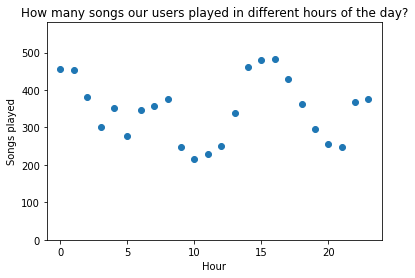

In [ ]:
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

plt.scatter(songs_in_hour_pd["hour"], songs_in_hour_pd["count"])
plt.xlim(-1, 24);
plt.ylim(0, 1.2 * max(songs_in_hour_pd["count"]))
plt.xlabel("Hour")
plt.ylabel("Songs played");
plt.title("How many songs our users played in different hours of the day?")

Drop Rows with Missing Values

In [ ]:
# Quitar los nan de los campos userId y sessionId
user_log_valid = user_log.dropna(how = "any", subset = ["userId", "sessionId"])

In [ ]:
user_log_valid.count()

10000

In [ ]:
user_log.select("userId").dropDuplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|  1000|
|  1003|
|  1005|
|  1006|
|  1017|
|  1019|
|  1020|
|  1022|
|  1025|
|  1030|
|  1035|
|  1037|
|   104|
|  1040|
|  1042|
|  1043|
|  1046|
+------+
only showing top 20 rows



In [ ]:
user_log_valid = user_log_valid.filter(user_log_valid["userId"] != "")

In [ ]:
user_log_valid.count()

9664

Users Downgrade Their Accounts

In [ ]:
user_log_valid.filter("page = 'Submit Downgrade'").show()

+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|hour|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|  null|Logged In|    Kelly|     F|           24|  Newton|  null| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|null|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|  11|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+


In [ ]:
user_log.select(["userId", "firstname", "page", "level", "song"]).where(user_log.userId == "1138").collect()

[Row(userId='1138', firstname='Kelly', page='Home', level='paid', song=None),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Everybody Everybody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Gears'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Use Somebody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love Of My Life (1993 Digital Remaster)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Down In The Valley Woe'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Treat Her Like A Lady'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song="Everybody Thinks You're An Angel"),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Fourteen Wives'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love On The Rocks'),
 Row(userId='1138', f

In [ ]:
# create a column
flag_downgrade_event = udf(lambda x: 1 if x == "Submit Downgrade" else 0, IntegerType())

In [ ]:
user_log_valid = user_log_valid.withColumn("downgraded", flag_downgrade_event("page"))

In [ ]:
user_log_valid.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='22', downgraded=0)

In [ ]:
from pyspark.sql import Window
windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)

In [ ]:
user_log_valid = user_log_valid.withColumn("phase", Fsum("downgraded").over(windowval))

## Exercises

In [ ]:
path = "/content/sparkify_log_small.json"
user_log3 = spark.read.json(path)

In [ ]:
user_log3 = user_log3.withColumn("downgraded", flag_downgrade_event("page"))

In [ ]:
user_log3.take(1)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', downgraded=0)]

### Which page did user id "" (empty string) NOT visit?

In [ ]:
user_log3.filter("userId = ''").show()

+------+----------+---------+------+-------------+--------+------+-----+--------+------+-----+------------+---------+----+------+-------------+---------+------+----------+
|artist|      auth|firstName|gender|itemInSession|lastName|length|level|location|method| page|registration|sessionId|song|status|           ts|userAgent|userId|downgraded|
+------+----------+---------+------+-------------+--------+------+-----+--------+------+-----+------------+---------+----+------+-------------+---------+------+----------+
|  null|Logged Out|     null|  null|            0|    null|  null| free|    null|   PUT|Login|        null|     5598|null|   307|1513721196284|     null|      |         0|
|  null|Logged Out|     null|  null|           26|    null|  null| paid|    null|   GET| Home|        null|      428|null|   200|1513721274284|     null|      |         0|
|  null|Logged Out|     null|  null|            5|    null|  null| free|    null|   GET| Home|        null|     2941|null|   200|15137220092

In [ ]:
pages = user_log3.select(["page","userId"]).where(user_log3.userId == '')

In [ ]:
pages.take(1)

[Row(page='Login', userId='')]

In [ ]:
# El user "" no ha visitado la pagina Next Song.
pages.select("page").dropDuplicates().sort("page").show()

+-----+
| page|
+-----+
|About|
| Help|
| Home|
|Login|
+-----+



### How many female users do we have in the data set?

In [ ]:
user_log3.take(1)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', downgraded=0)]

In [ ]:
user_log3.filter(user_log3.gender == 'F') \
    .select('userId', 'gender') \
    .dropDuplicates() \
    .count()

462

### How many songs were played from the most played artist?

In [ ]:
user_log3.filter(user_log3.page == 'NextSong') \
    .select('Artist') \
    .groupBy('Artist') \
    .agg({'Artist':'count'}) \
    .withColumnRenamed('count(Artist)', 'Artistcount') \
    .sort(desc('Artistcount')) \
    .show(1)

+--------+-----------+
|  Artist|Artistcount|
+--------+-----------+
|Coldplay|         83|
+--------+-----------+
only showing top 1 row



In [ ]:
user_log_valid.select(["userId", "firstname", "ts", "page", "level", "phase"]).where(user_log.userId == "1138").sort("ts").collect()

[Row(userId='1138', firstname='Kelly', ts=1513729066284, page='Home', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729066284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729313284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729552284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729783284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730001284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730263284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730518284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730768284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513731182284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firs

# Spark SQL for beginners
We have to create a temporary SQL table form the Dataframe enabling you to make the same queries that you'd write if you were using a database like postgress or Mysql.

If you end the session, you will need to rerun the query.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum

import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
spark = SparkSession \
    .builder \
    .appName("Data wrangling with Spark SQL") \
    .getOrCreate()

In [ ]:
path = "/content/sparkify_log_small.json"
user_log = spark.read.json(path)

In [ ]:
user_log.take(1)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046')]

In [ ]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



## Create a View And Run Queries

In [ ]:
user_log.createOrReplaceTempView("user_log_table")

In [ ]:
spark.sql("SELECT * FROM user_log_table LIMIT 2").show()

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|   Lily Allen|Logged In|Elizabeth|     F|            7|   Chase|195.23873| free|Shreveport-Bossie...|   PUT|NextSong|1512718541284|     5027|      

In [ ]:
spark.sql('''
          SELECT * 
          FROM user_log_table 
          LIMIT 2
          '''
          ).show()

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|   Lily Allen|Logged In|Elizabeth|     F|            7|   Chase|195.23873| free|Shreveport-Bossie...|   PUT|NextSong|1512718541284|     5027|      

## Data Exploration

In [ ]:
spark.sql('''
          SELECT COUNT(*) 
          FROM user_log_table 
          '''
          ).show()

+--------+
|count(1)|
+--------+
|   10000|
+--------+



In [ ]:
spark.sql('''
          SELECT DISTINCT page
          FROM user_log_table 
          ORDER BY page ASC
          '''
          ).show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



## Filtering data

In [ ]:
spark.sql('''
          SELECT userID, firstname, page, song
          FROM user_log_table 
          WHERE userID == '1046'
          '''
          ).collect()

[Row(userID='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userID='1046', firstname='Kenneth', page='Home', song=None),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userID='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userID='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userID='1046', firstname='Kenneth'

## Calculating Statistics by Hour

In [ ]:
songs_in_hour = spark.sql('''
          SELECT get_hour(ts) AS hour, COUNT(*) as plays_per_hour
          FROM user_log_table
          WHERE page = "NextSong"
          GROUP BY hour
          ORDER BY cast(hour as int) ASC
          '''
          )

In [ ]:
songs_in_hour.show()

+----+-----+
|hour|count|
+----+-----+
|   0|  456|
|   1|  454|
|   2|  382|
|   3|  302|
|   4|  352|
|   5|  276|
|   6|  348|
|   7|  358|
|   8|  375|
|   9|  249|
|  10|  216|
|  11|  228|
|  12|  251|
|  13|  339|
|  14|  462|
|  15|  479|
|  16|  484|
|  17|  430|
|  18|  362|
|  19|  295|
+----+-----+
only showing top 20 rows



## Converting Results to Pandas

Text(0.5, 1.0, 'How many songs our users played in different hours of the day?')

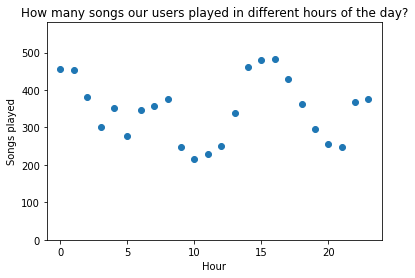

In [ ]:
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

plt.scatter(songs_in_hour_pd["hour"], songs_in_hour_pd["count"])
plt.xlim(-1, 24);
plt.ylim(0, 1.2 * max(songs_in_hour_pd["count"]))
plt.xlabel("Hour")
plt.ylabel("Songs played");
plt.title("How many songs our users played in different hours of the day?")

## Exercises

In [ ]:
path = "/content/sparkify_log_small.json"
user_log = spark.read.json(path)
user_log.createOrReplaceTempView("log_table")

### Which page did user id "" (empty string) NOT visit?

In [ ]:
# SELECT distinct pages for the blank user and distinc pages for all users
# Right join the results to find pages that blank visitor did not visit
spark.sql("SELECT * \
            FROM ( \
                SELECT DISTINCT page \
                FROM log_table \
                WHERE userID='') AS user_pages \
            RIGHT JOIN ( \
                SELECT DISTINCT page \
                FROM log_table) AS all_pages \
            ON user_pages.page = all_pages.page \
            WHERE user_pages.page IS NULL").show()

+----+----------------+
|page|            page|
+----+----------------+
|null|Submit Downgrade|
|null|       Downgrade|
|null|          Logout|
|null|   Save Settings|
|null|        Settings|
|null|        NextSong|
|null|         Upgrade|
|null|           Error|
|null|  Submit Upgrade|
+----+----------------+



### How many female users do we have in the data set?

In [ ]:
spark.sql("SELECT COUNT(DISTINCT userID) \
            FROM log_table \
            WHERE gender = 'F'").show()

+----------------------+
|count(DISTINCT userID)|
+----------------------+
|                   462|
+----------------------+



### How many songs were played from the most played artist?

In [ ]:
# Here is one solution
spark.sql("SELECT Artist, COUNT(Artist) AS plays \
        FROM log_table \
        GROUP BY Artist \
        ORDER BY plays DESC \
        LIMIT 1").show()

# Here is an alternative solution
# Get the artist play counts
play_counts = spark.sql("SELECT Artist, COUNT(Artist) AS plays \
        FROM log_table \
        GROUP BY Artist")

# save the results in a new view
play_counts.createOrReplaceTempView("artist_counts")

# use a self join to find where the max play equals the count value
spark.sql("SELECT a2.Artist, a2.plays FROM \
          (SELECT max(plays) AS max_plays FROM artist_counts) AS a1 \
          JOIN artist_counts AS a2 \
          ON a1.max_plays = a2.plays \
          ").show()

+--------+-----+
|  Artist|plays|
+--------+-----+
|Coldplay|   83|
+--------+-----+

+--------+-----+
|  Artist|plays|
+--------+-----+
|Coldplay|   83|
+--------+-----+



In [ ]:
spark.stop()